### Import Packages and Reading of Data

In [1]:
import time
import warnings
import pickle

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# Reading of Excel
dataset = pd.read_csv('cleaned_others_dataset.csv')

In [3]:
dataset

,verified,location,followers_count,following_count,tweet_count,isFraud,un_no_of_char,un_special_char,un_uppercase,name_no_of_char,name_special_char,name_uppercase,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,1997,5,17090,1,15,1,0,19,0,1,2,0,0,1,2016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88127,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88128,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88129,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
88130,1,1,803247,7,3159,0,9,1,1,10,1,0,0,0,0,0,2012,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### Feature Engineering

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["isFraud"]), dataset["isFraud"], test_size = 0.2, random_state=101)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (70505, 35) (70505,)
Test set: (17627, 35) (17627,)


In [5]:
scaler = StandardScaler()
fitted = scaler.fit(X_train)
X_train_fitted = fitted.transform(X_train)
X_test_fitted = fitted.transform(X_test)

In [6]:
x_train = pd.DataFrame(X_train_fitted, columns = X_train.columns)
x_test = pd.DataFrame(X_test_fitted, columns = X_test.columns)
y_train = pd.DataFrame(y_train, columns = ["isFraud"])
y_test = pd.DataFrame(y_test, columns = ["isFraud"])

### Charts

In [7]:
def feature_chart(feature_importance_df, model_type):
#     feature_importance_df = pd.DataFrame(model.coef_.T, x_train.columns.T,columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
    fig = feature_importance_df.plot(kind="barh", figsize=(12, 15))
    bg = fig.patch
    bg.set_facecolor("white")
    plt.gca().invert_yaxis()
    plt.grid()
#     plt.savefig(f'Charts\\{model_type} Feature Importance.png', dpi=300, facecolor=fig.get_facecolor())
    plt.show()

### Random Forest
* Model (Random Search + Grid Search)
* Error Metrics
* Plot for Feature Importance

#### Model (Random Search)

In [8]:
%%time

# Model
rf_model = RandomForestClassifier()

space = dict()

# Number of trees in random forest
space["n_estimators"] = [10, 50, 200, 600, 800, 1200]

# Number of features to consider at every split
space["max_features"] = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree (how deep the tree goes)
space["max_depth"] = [None, 10, 40, 80, 120]

# Minimum number of samples required to split a node
space["min_samples_split"] = [2, 10, 40, 100]

# Method of selecting samples for training each tree (bootstrap sampling or not)
space["bootstrap"] = [True, False]

# Define search
# search = RandomizedSearchCV(rf_model, space, scoring='neg_mean_absolute_error', cv = 5, verbose=2, random_state=123, n_jobs = -1)

# Execute search
# results_random = search.fit(x_train, np.ravel(y_train))

# Save the model to disk
filename = '02 Random Forest (random).sav'
# pickle.dump(results_random, open(filename, 'wb'))

# Load the model from disk
results_random = pickle.load(open(filename, 'rb'))

print('Best Score: %s' % results_random.best_score_)
print('Best Hyperparameters: %s' % results_random.best_params_)
# 16 mins

Best Score: -0.012552301255230125
Best Hyperparameters: {'n_estimators': 800, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}
Wall time: 5 s


In [9]:
# y_prediction
y_pred_random = results_random.predict(x_test)

In [10]:
# Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred_random)
print(f'MAE: {mae}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_random))
print(f'RMSE: {rmse}')
f1_score = metrics.f1_score(y_test, y_pred_random)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_random)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_random)
print(f'Recall: {recall}')

MAE: 0.00919044647415896
RMSE: 0.09586681633474098
F1-score: 0.9791021671826625
Precision: 0.9916383590279593
Recall: 0.9668789808917198


#### Model (Grid Search)

In [11]:
%%time

# Model
rf_model = RandomForestClassifier()

grid = dict()

# Number of trees in random forest
grid["n_estimators"] = [30, 200, 600, 1200]

# Number of features to consider at every split
grid["max_features"] = ['sqrt', 'log2']

# Maximum number of levels in tree (how deep the tree goes)
grid["max_depth"] = [None, 20, 80, 120]

# Minimum number of samples required to split a node
grid["min_samples_split"] = [2, 10, 20]

# Method of selecting samples for training each tree (bootstrap sampling or not)
grid["bootstrap"] = [True]

# Define search
# search = GridSearchCV(rf_model, grid, cv = 5, n_jobs = -1, verbose = 2)

# Execute search
# results_grid = search.fit(x_train, np.ravel(y_train))

# Save the model to disk
filename = '02 Random Forest (grid).sav'
# pickle.dump(results_grid, open(filename, 'wb'))

# Load the model from disk
results_grid = pickle.load(open(filename, 'rb'))

print('Best Score: %s' % results_grid.best_score_)
print('Best Hyperparameters: %s' % results_grid.best_params_)
#2 hrs 19mins

Best Score: 0.9876037160485073
Best Hyperparameters: {'bootstrap': True, 'max_depth': 80, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 600}
Wall time: 3.56 s


In [12]:
# y_prediction
y_pred_grid = results_grid.predict(x_test)

In [13]:
# Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred_grid)
print(f'MAE: {mae}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid))
print(f'RMSE: {rmse}')
f1_score = metrics.f1_score(y_test, y_pred_grid)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_grid)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_grid)
print(f'Recall: {recall}')

MAE: 0.009701026833834458
RMSE: 0.09849379083898872
F1-score: 0.9779383305379952
Precision: 0.9905906952430737
Recall: 0.9656050955414013


#### Model (Optimal Hyperparameters)

In [14]:
# Model
rf_regression = RandomForestClassifier(bootstrap=False, max_depth=80, max_features='auto', min_samples_split=2, n_estimators=800)
rf_model = rf_regression.fit(x_train, np.ravel(y_train))

# Save the model to disk
filename = '02 Random Forest (Optimal).sav'
# pickle.dump(rf_model, open(filename, 'wb'))

# Load the model from disk
rf_regression = pickle.load(open(filename, 'rb'))

In [15]:
# y_prediction
y_pred_optimal = rf_model.predict(x_test)

In [16]:
# Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred_optimal)
print(f'MAE: {mae}')
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_optimal))
print(f'RMSE: {rmse}')
f1_score = metrics.f1_score(y_test, y_pred_optimal)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred_optimal)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred_optimal)
print(f'Recall: {recall}')

MAE: 0.00919044647415896
RMSE: 0.09586681633474098
F1-score: 0.9791075573897344
Precision: 0.991381561765474
Recall: 0.9671337579617835


#### Feature Importance

In [17]:
# rf_model.feature_importances_
feature = pd.DataFrame(rf_model.feature_importances_, x_train.columns.T, columns=['Feature Importance']).sort_values(by='Feature Importance', ascending=False)
feature

,Feature Importance
followers_count,0.188922
following_count,0.178100
tweet_count,0.149830
year,0.071811
name_no_of_char,0.065508
un_no_of_char,0.051431
verified,0.034076
des_no_of_usertags,0.018162
has_description,0.016000
location,0.014923


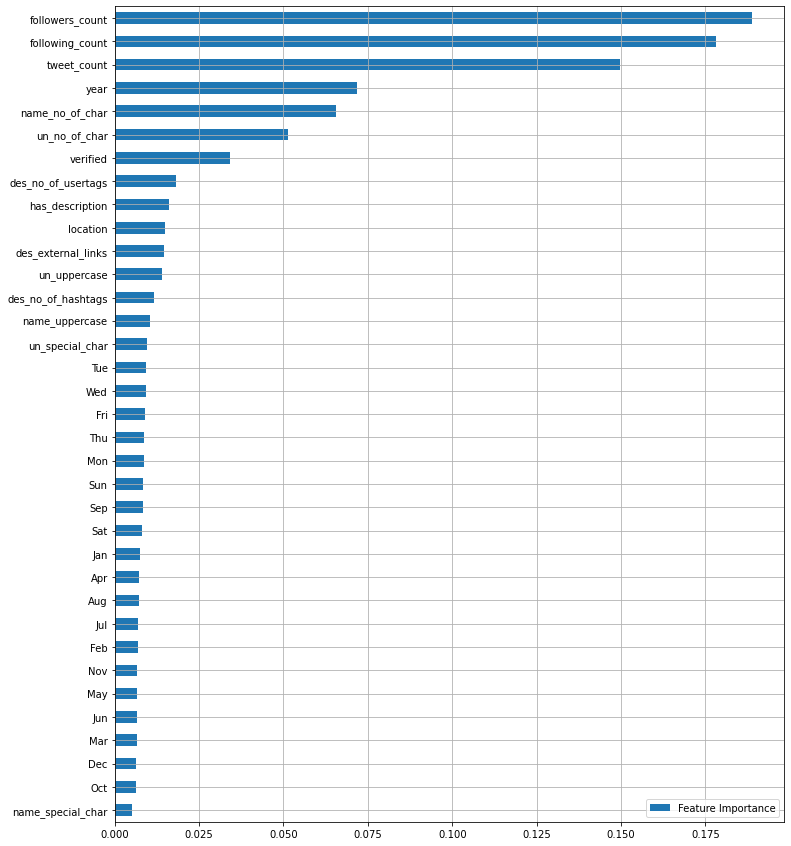

In [18]:
feature_chart(feature, "Random Forest")